In [2]:
import pandas as pd
import numpy as np
import random
import string
import matplotlib.pyplot as plt

In [3]:
keywords = pd.DataFrame(np.random.randint(low=0, high=10, size=(100, 2)),
...                    columns=['Keywords', "Timestamp"])

In [4]:
keywords = keywords.sort_values(['Timestamp'], ascending=[1])
keywords.head()

,Keywords,Timestamp
49,3,0
87,3,0
76,0,0
39,0,0
22,3,0


In [5]:
df = pd.DataFrame(np.random.randint(low=0, high=10, size=(100, 10)), columns=['time.start','time.end', 'frame.start', 'frame.end', 'transcript','frames.before','frames.after','angry.change','surprise.change','happy.change'])

#If you want random keywords
#df["keywords"] = [''.join(random.choice(string.ascii_uppercase + string.digits) for _ in range(10)) for x in range(100)]

#Randomly sample from finite list of keywords
possible_keywords = ['a', 'b', 'c', 'd', 'e']
df["keywords"] = [random.choice(possible_keywords) for x in range(100)]

In [6]:
df = df.sort_values(['time.start'], ascending=[1])
df.head()

,time.start,time.end,frame.start,frame.end,transcript,frames.before,frames.after,angry.change,surprise.change,happy.change,keywords
99,0,8,2,7,8,6,6,1,5,7,b
37,0,2,3,7,3,4,0,0,3,2,a
55,0,2,9,2,1,7,8,3,3,3,d
60,0,9,6,5,8,1,4,0,6,3,c
32,0,6,7,3,0,9,6,4,8,1,b


In [79]:
#This computes the correlation mat
df_keywords_dummies = pd.get_dummies(df)
corr_matrix = df_keywords_dummies.iloc[:,7:].corr()
corr_matrix


,keyword,correlation
angry,keywords_d,0.0638531
surprise,keywords_d,0.105586
happy,keywords_c,0.100111


In [34]:
#This outputs the top keywords for changing the three emotions
top_keywords = pd.DataFrame(index=['angry','surprise','happy'],columns=["keyword","correlation"])
keyword_index = ['angry','surprise','happy']
for x in range(0,3):
    top_keywords.loc[keyword_index[x],"keyword"] = corr_matrix.iloc[x,3:].idxmax()
    top_keywords.loc[keyword_index[x],"correlation"] = np.max(corr_matrix.iloc[x,3:],axis=0)
top_keywords

,angry.change,surprise.change,happy.change,keywords_a,keywords_b,keywords_c,keywords_d,keywords_e
angry.change,1.000000,0.160299,-0.109773,0.001390,-0.084593,-0.022670,0.063853,0.033715
surprise.change,0.160299,1.000000,0.007713,-0.066842,0.068204,-0.062089,0.105586,-0.053448
happy.change,-0.109773,0.007713,1.000000,-0.034268,0.001256,0.100111,-0.084580,0.017141
keywords_a,0.001390,-0.066842,-0.034268,1.000000,-0.196818,-0.216587,-0.236067,-0.223100
keywords_b,-0.084593,0.068204,0.001256,-0.196818,1.000000,-0.241560,-0.263286,-0.248825
keywords_c,-0.022670,-0.062089,0.100111,-0.216587,-0.241560,1.000000,-0.289731,-0.273817
keywords_d,0.063853,0.105586,-0.084580,-0.236067,-0.263286,-0.289731,1.000000,-0.298444
keywords_e,0.033715,-0.053448,0.017141,-0.223100,-0.248825,-0.273817,-0.298444,1.000000


In [59]:
# Plots a radar chart.

from math import pi
import matplotlib.pyplot as plt

def make_plot(values):

    # Set data
    cat = ['Happy', 'Sad', 'Angry']
    

    N = len(cat)

    x_as = [n / float(N) * 2 * pi for n in range(N)]

    # Because our chart will be circular we need to append a copy of the first 
    # value of each list at the end of each list with data
    values += values[:1]
    x_as += x_as[:1]


    # Set color of axes
    plt.rc('axes', linewidth=0.5, edgecolor="#888888")


    # Create polar plot
    ax = plt.subplot(111, polar=True)


    # Set clockwise rotation. That is:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)


    # Set position of y-labels
    ax.set_rlabel_position(0)


    # Set color and linestyle of grid
    ax.xaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)
    ax.yaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)


    # Set number of radial axes and remove labels
    plt.xticks(x_as[:-1], [])

    # Set yticks
    plt.yticks([20, 40, 60, 80, 100], ["20", "40", "60", "80", "100"])


    # Plot data
    ax.plot(x_as, values, linewidth=0, linestyle='solid', zorder=3)

    # Fill area
    ax.fill(x_as, values, 'b', alpha=0.3)


    # Set axes limits
    plt.ylim(0, 100)


    # Draw ytick labels to make sure they fit properly
    for i in range(N):
        angle_rad = i / float(N) * 2 * pi

        if angle_rad == 0:
            ha, distance_ax = "center", 10
        elif 0 < angle_rad < pi:
            ha, distance_ax = "left", 1
        elif angle_rad == pi:
            ha, distance_ax = "center", 1
        else:
            ha, distance_ax = "right", 1

        ax.text(angle_rad, 100 + distance_ax, cat[i], size=10, horizontalalignment=ha, verticalalignment="center")


    # Show polar plot
    plt.show()

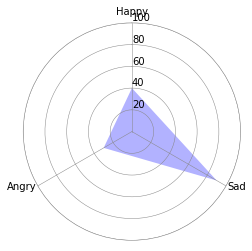